<a href="https://colab.research.google.com/github/Rushinalawade/Credit-Card-Fraud-Detection-Model/blob/main/Credit_Card_Fraud_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic** : Classification

**Member** : Rushikesh Nalawade

<h2> Project Summary <h2>

Credit card frauds are easy and friendly targets. E-commerce and many other online sites have increased the online payment modes, increasing the risk for online frauds. Increase in fraud rates, researchers started using different machine learning methods to detect and analyse frauds in online transactions.

So this project focuses on building a machine learning model which will help business take decision on which customer will default.

<H2> Problem Statement <H2>

Here the task is to predict if the customer will have default on credt card bills by analysing various independent parameters. Here we are going to use a classification model.

In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold

In [2]:
#Dataset loading:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Notebook/default of credit card clients.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#shape of dataset:
df.shape

(30000, 25)

In [6]:
# dataset info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
#dataset describe()
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
# dataset null values.
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


<Axes: >

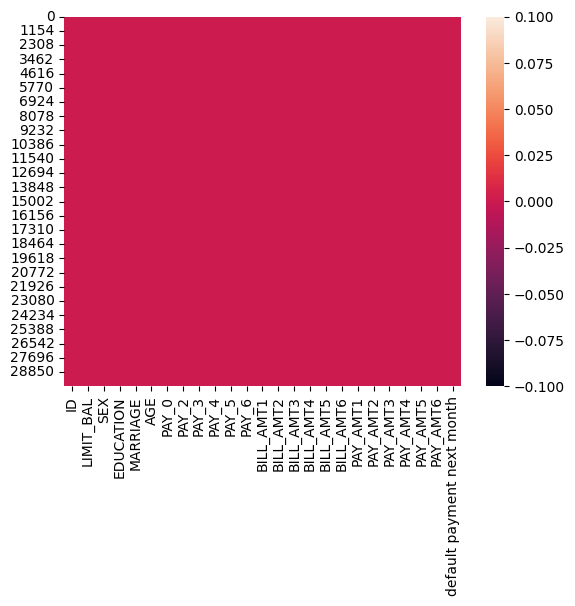

In [9]:
# visualizing the null values.
sns.heatmap(df.isnull())

In [10]:
#Duplicate Values:
df.duplicated().sum()

0

In [11]:
# Droping the Null Values.
df.dropna(inplace=True)
df.shape

(30000, 25)

In [12]:
# Unique Values in dataset:
colm = df.columns
for col in colm:
  value = df[col].nunique()
  print(f'{col} contain {value} unique values')

ID contain 30000 unique values
LIMIT_BAL contain 81 unique values
SEX contain 2 unique values
EDUCATION contain 7 unique values
MARRIAGE contain 4 unique values
AGE contain 56 unique values
PAY_0 contain 11 unique values
PAY_2 contain 11 unique values
PAY_3 contain 11 unique values
PAY_4 contain 11 unique values
PAY_5 contain 10 unique values
PAY_6 contain 10 unique values
BILL_AMT1 contain 22723 unique values
BILL_AMT2 contain 22346 unique values
BILL_AMT3 contain 22026 unique values
BILL_AMT4 contain 21548 unique values
BILL_AMT5 contain 21010 unique values
BILL_AMT6 contain 20604 unique values
PAY_AMT1 contain 7943 unique values
PAY_AMT2 contain 7899 unique values
PAY_AMT3 contain 7518 unique values
PAY_AMT4 contain 6937 unique values
PAY_AMT5 contain 6897 unique values
PAY_AMT6 contain 6939 unique values
default payment next month contain 2 unique values


<h3> Lets prepare Dataset for Analysis <h3>

In [13]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [14]:
# lets see the target variable.
df['default payment next month'].value_counts()

,count
default payment next month,
0,23364
1,6636


<h1> Lets do some visualization <h1>

<Axes: xlabel='AGE', ylabel='count'>

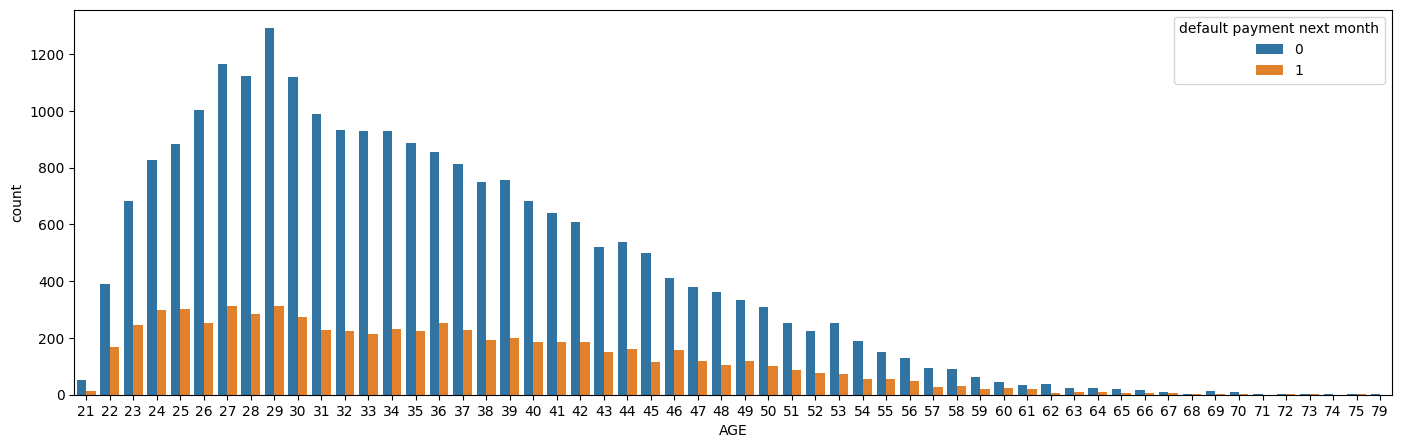

In [15]:
# countplot for age and TenyearCHD:
plt.figure(figsize=(17,5))
sns.countplot(data=df,x='AGE',hue='default payment next month')

From the plot we can find that data is very imbalance(0 values are large in number than 1), Here we can see that most credit card user are in age 22 to 40 years and where also most fraud happens.

<Axes: xlabel='SEX', ylabel='count'>

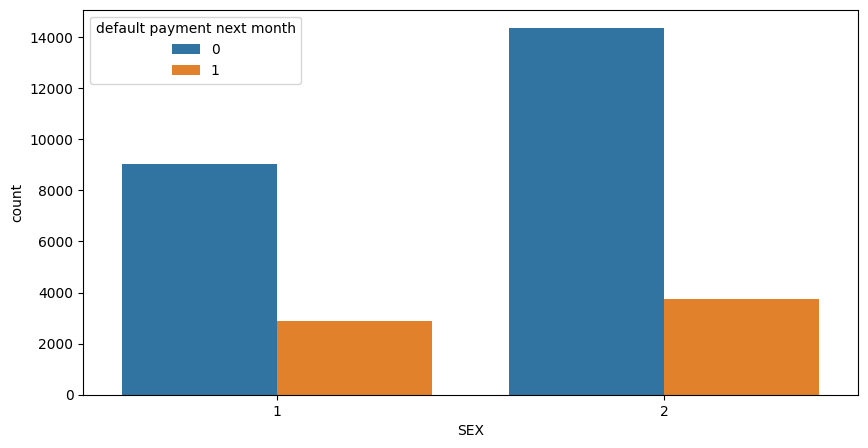

In [16]:
# Lets compare genders:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='SEX',hue='default payment next month')

Here 1 represent Females and 2 represent Males. We find that male defaultor are slightly more than female, but if we compare the ratio there are approx 25% male defaultor and 33% female defaultors.

In [17]:
df['SEX'].value_counts()

,count
SEX,
2,18112
1,11888


<Axes: xlabel='MARRIAGE', ylabel='count'>

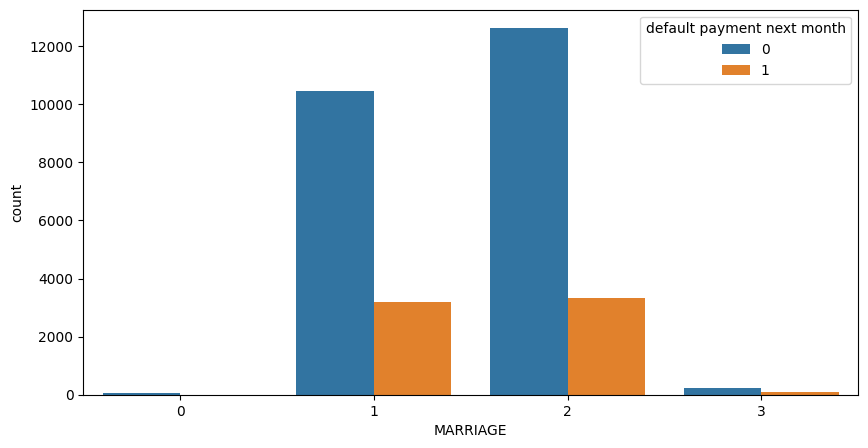

In [18]:

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='MARRIAGE',hue='default payment next month')

0 widow, 1 married, 2 single, 3 divorced


Single martial status customer are more followed by married one, but defaultors count is approx same in both cases.

In [19]:
df['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,15964
1,13659
3,323
0,54


<Axes: xlabel='AGE', ylabel='LIMIT_BAL'>

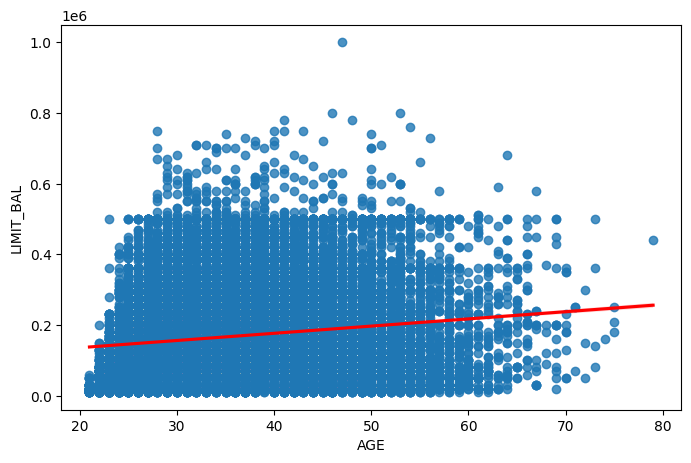

In [20]:
#lets see relationship between Age and Limit Balance.
plt.figure(figsize=(8,5))
sns.regplot(data=df,x='AGE',y='LIMIT_BAL',line_kws={"color": "red"})

Here we can see a positive relation between age and Balance limit, with increase in age and Balance limit also increase.

In [21]:
df['EDUCATION'].value_counts()

,count
EDUCATION,
2,14030
1,10585
3,4917
5,280
4,123
6,51
0,14


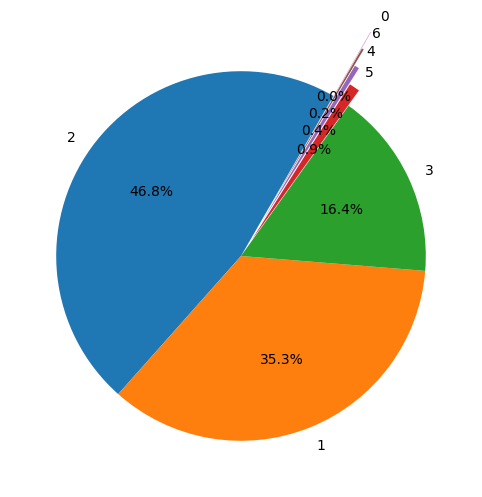

In [22]:
#Lets look upon the education:
plt.figure(figsize=(8, 6))
plt.pie(df['EDUCATION'].value_counts(),labels=df['EDUCATION'].unique(),startangle=60,explode=[0,0,0,0.1,0.2,0.3,0.4],autopct='%1.1f%%')
plt.show()

If we consider Ordinal data most of the customer in our survey belongs to class 2 Education i.e. 46.8%

<Axes: >

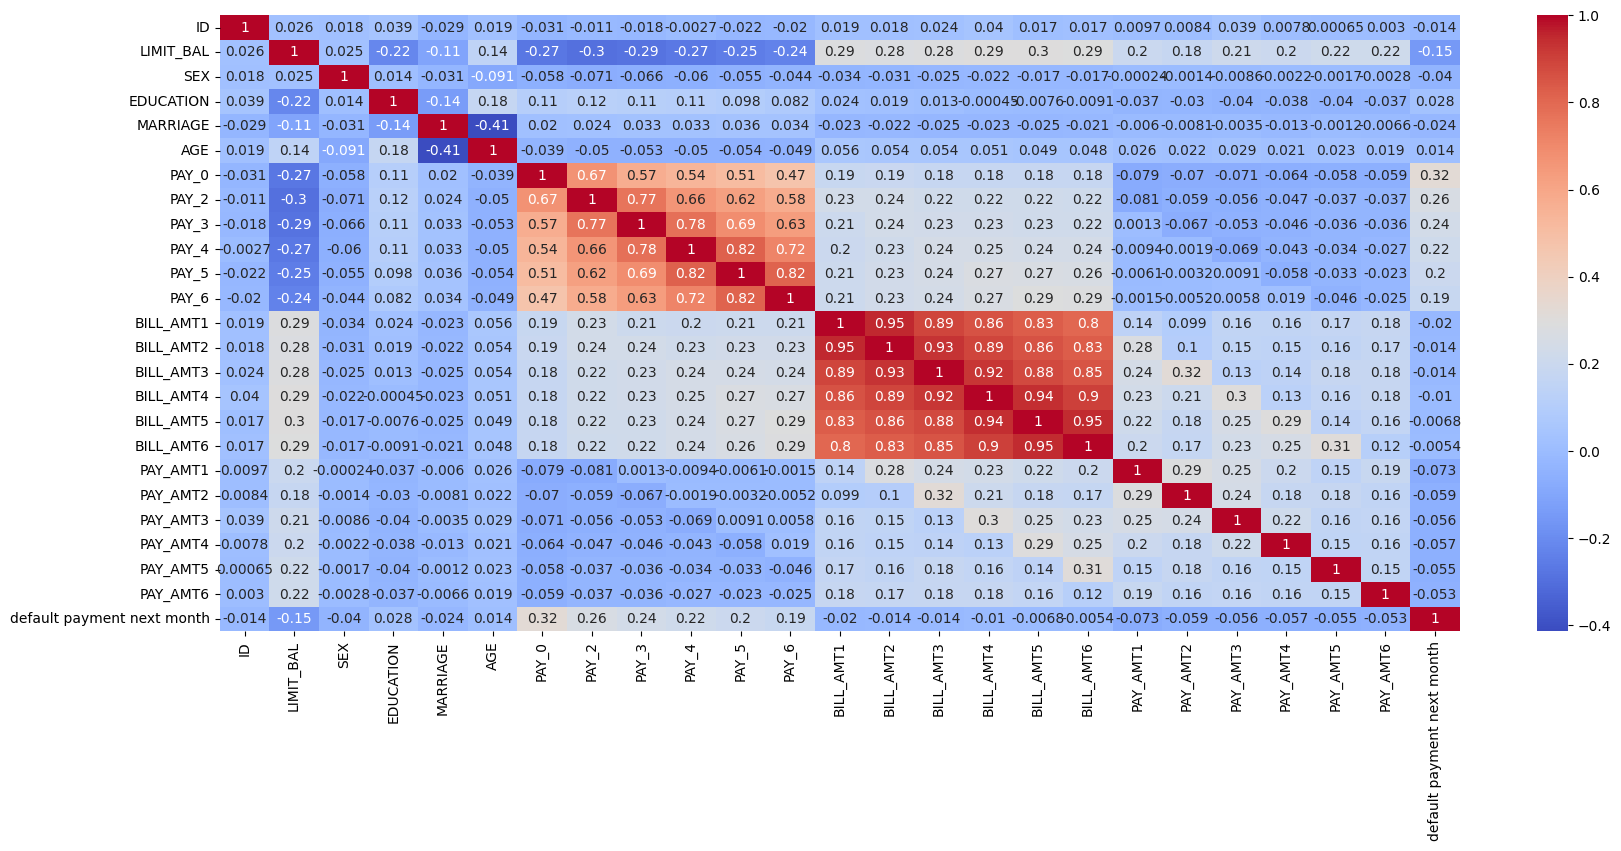

In [23]:
# lets see correlation between the variables:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<h1> Feature Selection

In [24]:
numrical_features = df.drop(columns={'ID','SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month'})

In [25]:
numrical_features

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [26]:
categorical_features = df.drop(list(numrical_features.columns),axis=1)
categorical_features.drop('default payment next month',axis=1,inplace=True)

In [27]:
categorical_features

,ID,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,2,2,1,2,2,-1,-1,-2,-2
1,2,2,2,2,-1,2,0,0,0,2
2,3,2,2,2,0,0,0,0,0,0
3,4,2,2,1,0,0,0,0,0,0
4,5,1,2,1,-1,0,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
29995,29996,1,3,1,0,0,0,0,0,0
29996,29997,1,3,2,-1,-1,-1,-1,0,0
29997,29998,1,2,2,4,3,2,-1,0,0
29998,29999,1,3,1,1,-1,0,0,0,-1


In [28]:
y = df['default payment next month']

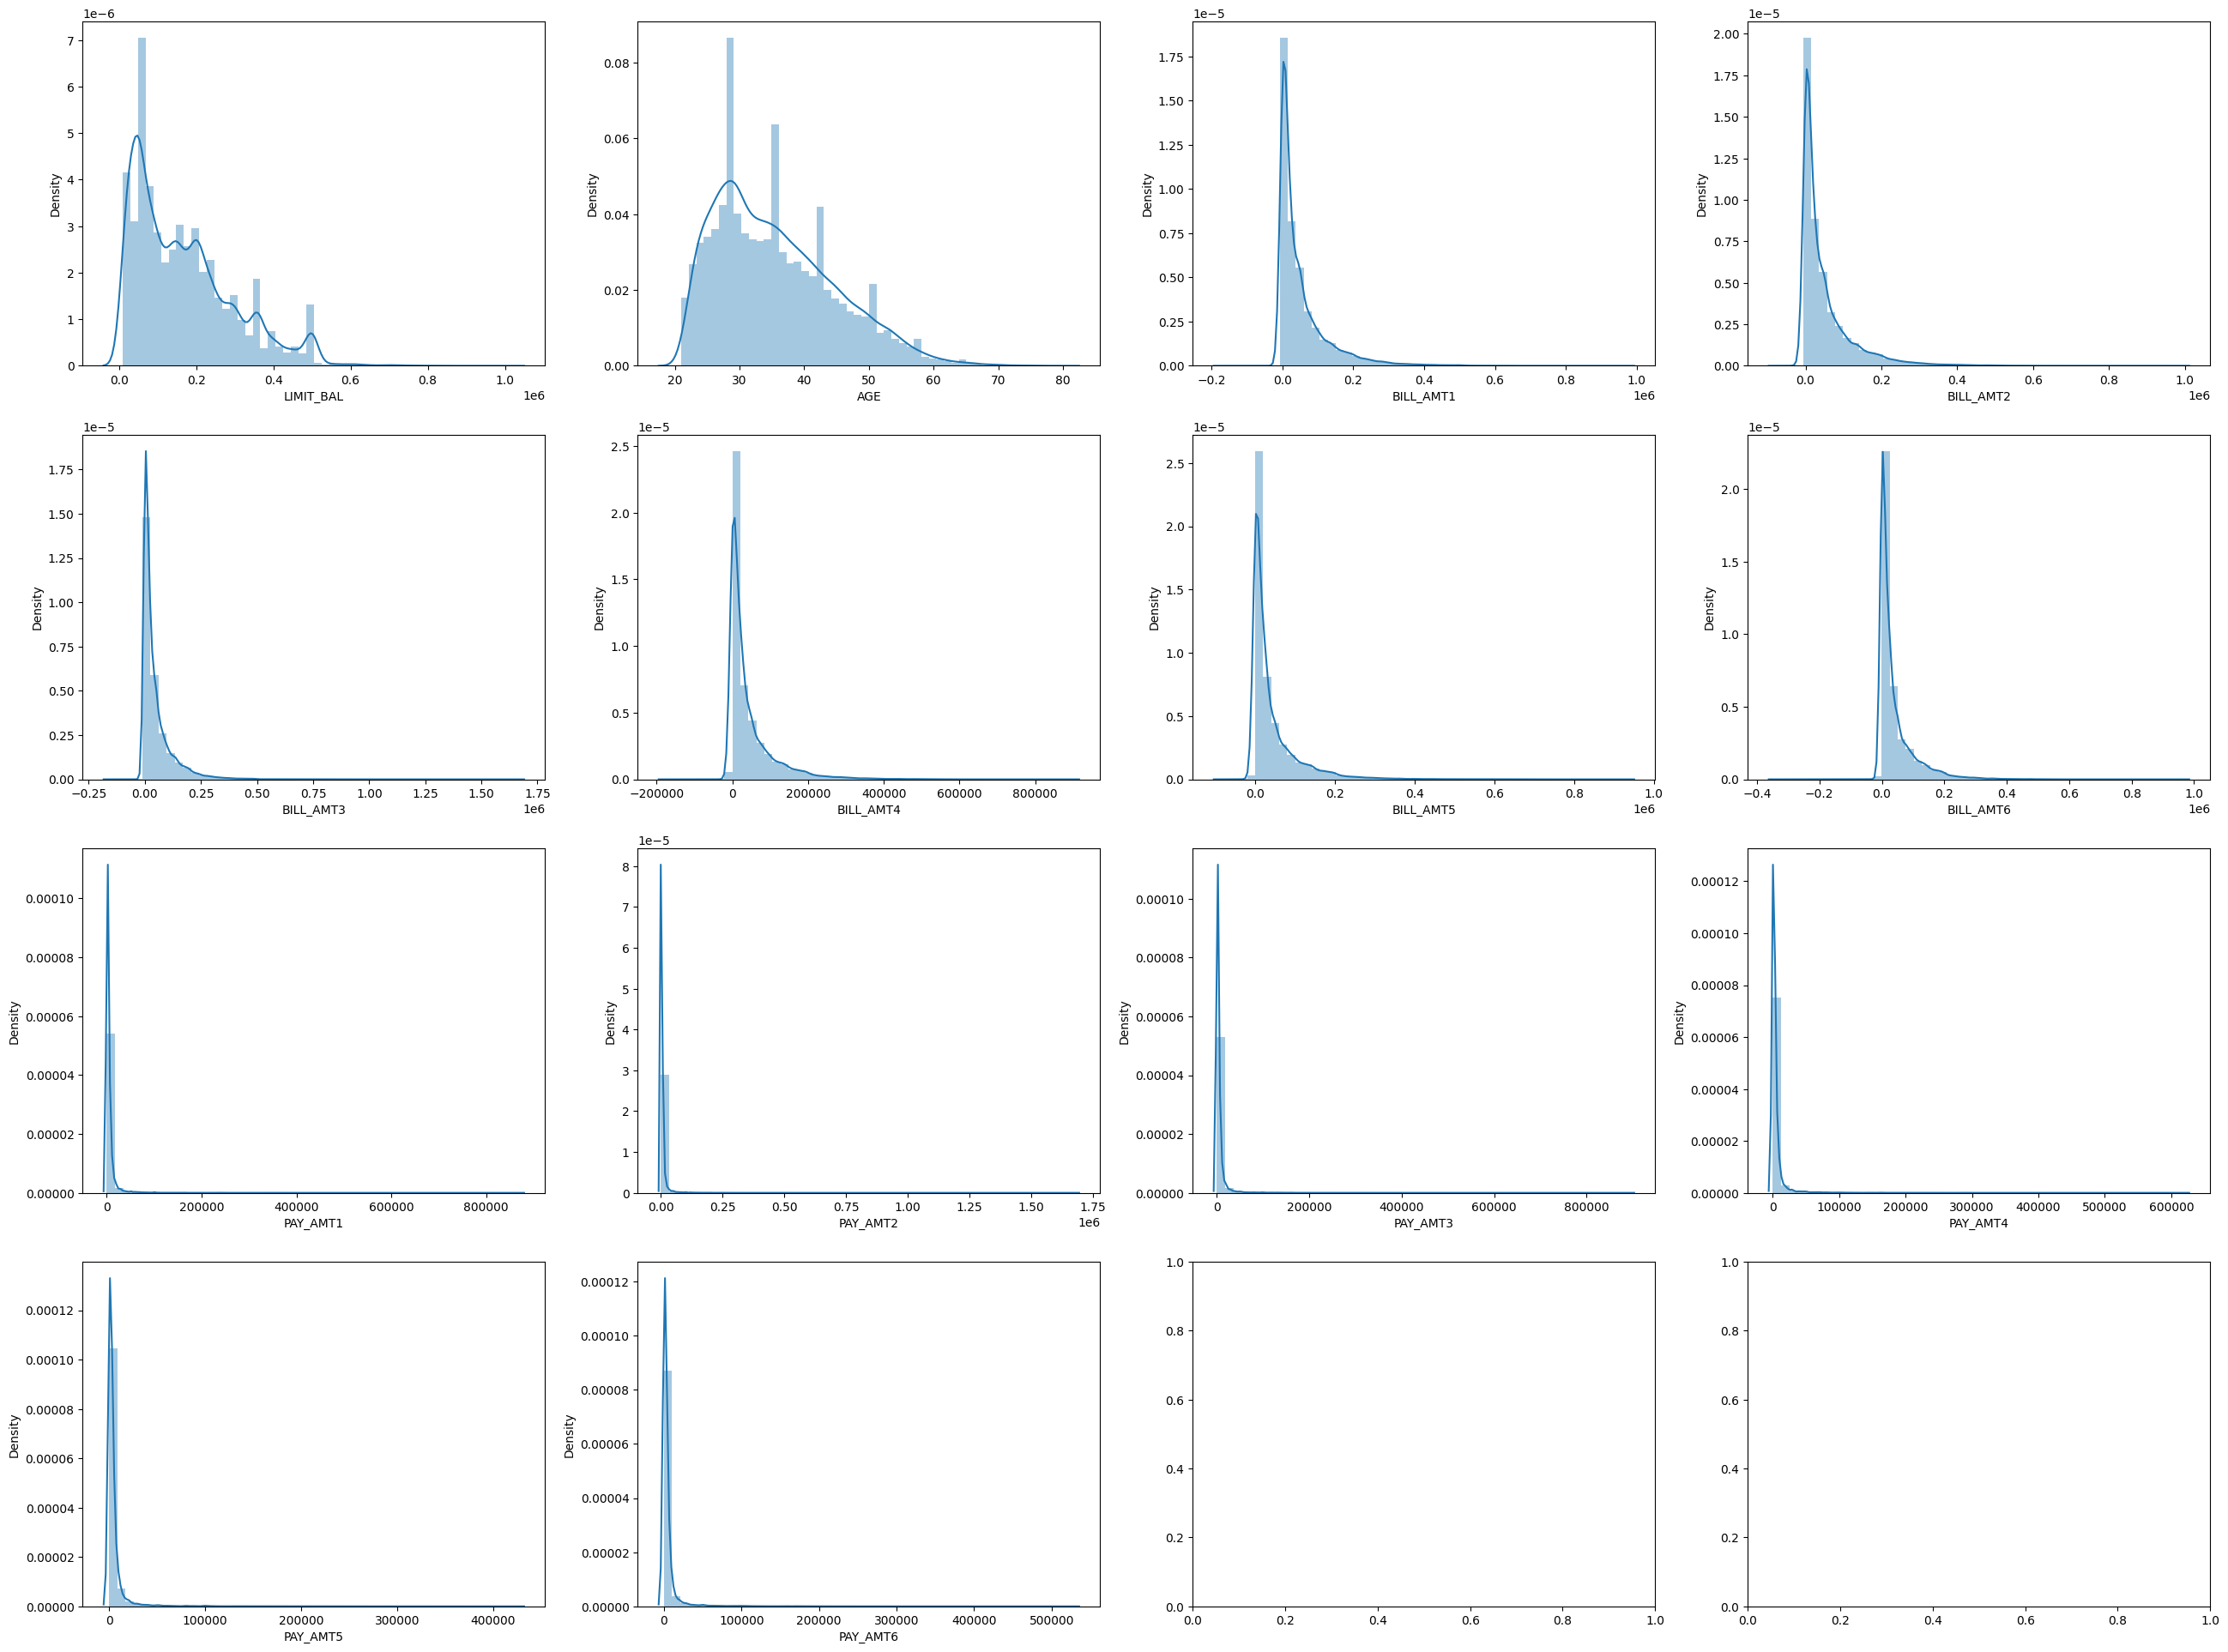

In [29]:
fig,axs = plt.subplots(4,4,figsize=(32,24))
axs = axs.ravel()
i = 0
for col in numrical_features.columns:
  sns.distplot(numrical_features[col],ax=axs[i])
  i=i+1

In [30]:
trans_num_features = pd.DataFrame()
for col in numrical_features.columns:
  trans_num_features[col] = np.cbrt(numrical_features[col])

In [31]:
trans_num_features

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,27.144176,2.884499,15.758079,14.584132,8.832285,0.000000,0.000000,0.000000,0.000000,8.832285,0.000000,0.000000,0.000000,0.000000
1,49.324241,2.962496,13.893754,11.993052,13.893754,14.845828,15.117594,14.829173,0.000000,10.000000,10.000000,10.000000,0.000000,12.599210
2,44.814047,3.239612,30.807338,24.116906,23.845653,24.289887,24.633589,24.959401,11.492749,11.447142,10.000000,10.000000,10.000000,17.099759
3,36.840315,3.332222,36.085701,36.401121,36.665353,30.478979,30.708683,30.915134,12.599210,12.638982,10.626586,10.322801,10.224904,10.000000
4,36.840315,3.848501,20.501487,17.831766,32.968749,27.562941,26.752191,26.745203,12.599210,33.226178,21.544347,20.800838,8.832285,8.789347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,60.368107,3.391211,57.382672,57.771495,59.284559,44.480276,31.493658,25.187917,20.408276,27.144176,17.103179,14.497423,17.099759,10.000000
29996,53.132928,3.503398,11.894916,12.227154,15.185836,20.784647,17.313669,0.000000,12.247188,15.220448,20.799297,5.052774,0.000000,0.000000
29997,31.072325,3.332222,15.276359,14.971799,14.023769,27.535711,27.404961,26.850107,0.000000,0.000000,28.020393,16.134286,12.599210,14.580997
29998,43.088694,3.448217,-11.804709,42.795677,42.414638,37.509390,22.801698,36.579112,44.122934,15.050202,10.561244,12.441863,37.554351,12.173408


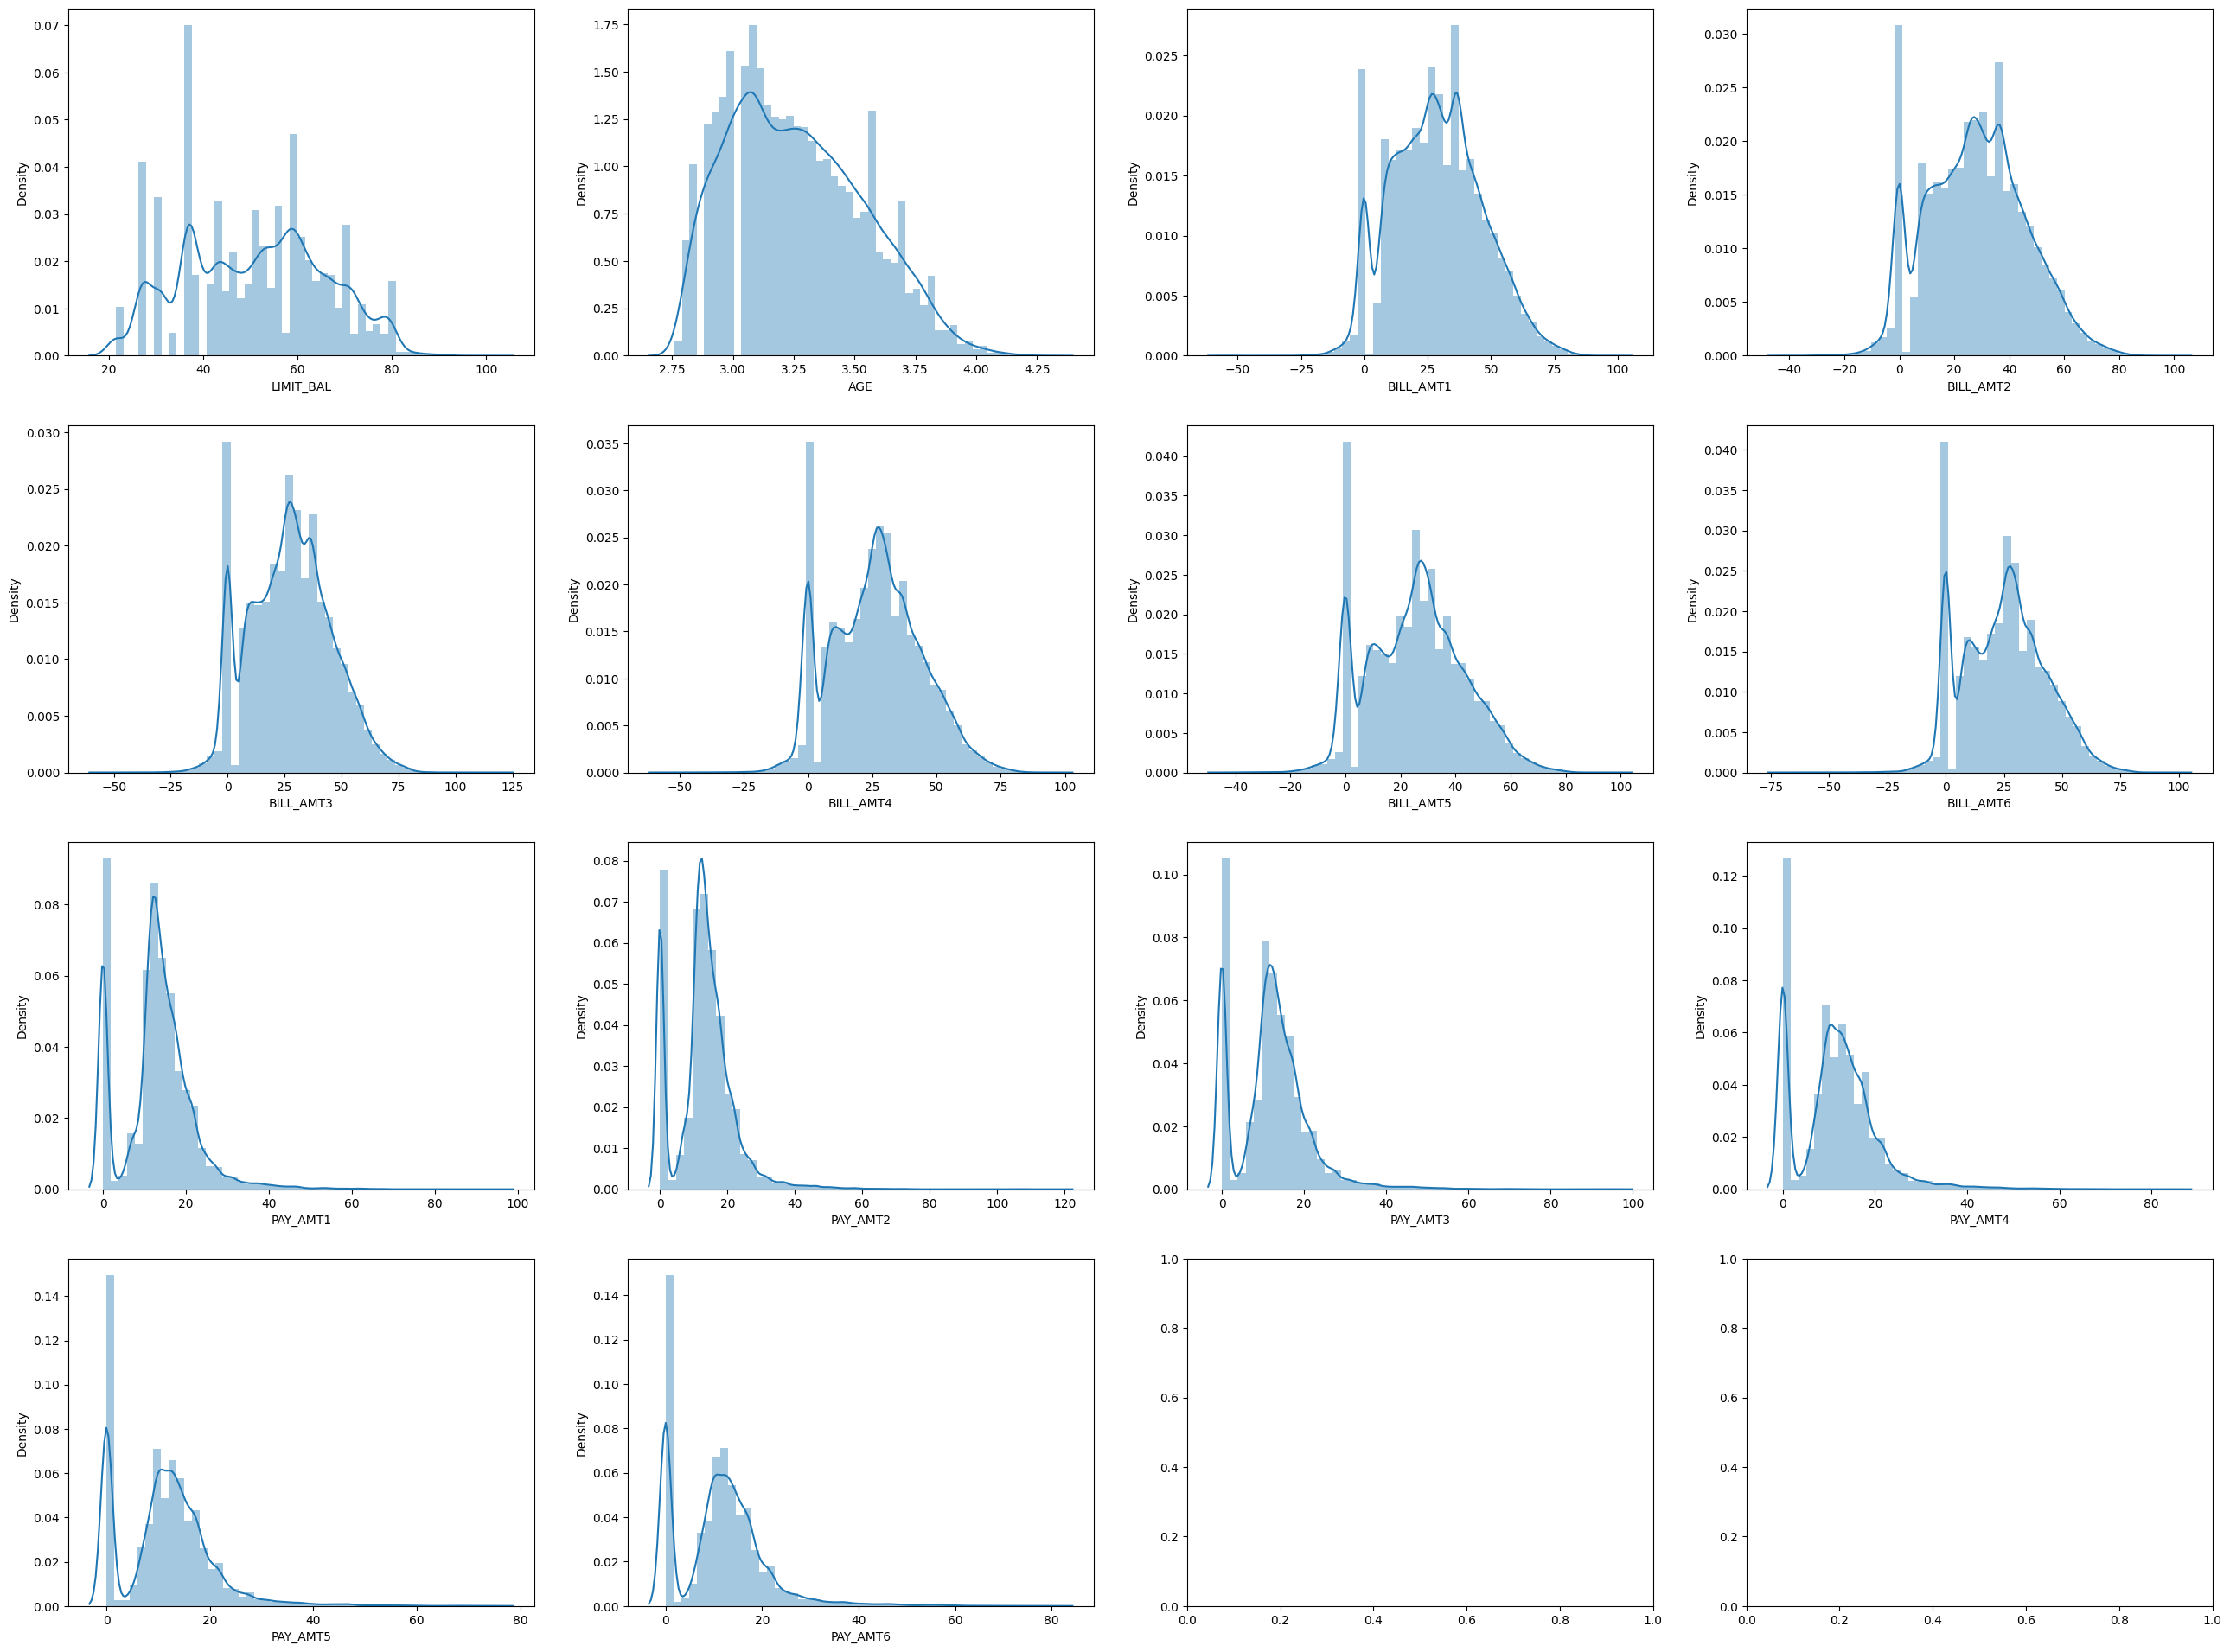

In [32]:
fig,axs = plt.subplots(4,4,figsize=(32,24))
axs = axs.ravel()
i = 0
for col in trans_num_features.columns:
  sns.distplot(trans_num_features[col],ax=axs[i])
  i=i+1


In [33]:
# Selecting categorical features with chi2 test.
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(categorical_features)
bestfeatures = SelectKBest(score_func= chi2 ,k='all')
bestfeatures.fit_transform(x_scaled,y)

feature_score = pd.DataFrame(bestfeatures.scores_)
feature_pscore = pd.DataFrame(np.round(bestfeatures.pvalues_,4))
features = pd.DataFrame(categorical_features.columns)
features_df = pd.concat([features,feature_score,feature_pscore],axis=1)
features_df.columns = ['Features','Score','p_value']
features_df.sort_values(by='Score',ascending=False)

,Features,Score,p_value
4,PAY_0,201.517549,0.0000
5,PAY_2,160.027300,0.0000
6,PAY_3,129.692706,0.0000
7,PAY_4,108.131709,0.0000
8,PAY_5,92.598810,0.0000
9,PAY_6,81.065996,0.0000
1,SEX,18.983326,0.0000
2,EDUCATION,1.321876,0.2503
3,MARRIAGE,1.040003,0.3078
0,ID,0.973350,0.3238


In [34]:
# Selecting numerical Features using f-test.
bestfeatures = SelectKBest(score_func=f_classif,k='all')
bestfeatures.fit_transform(trans_num_features,y)

feature_score = pd.DataFrame(bestfeatures.scores_)
feature_pscore = pd.DataFrame(np.round(bestfeatures.pvalues_,4))
features = pd.DataFrame(numrical_features.columns)
features_df = pd.concat([features,feature_score,feature_pscore],axis=1)
features_df.columns = ['Features','Score','p_value']
features_df.sort_values(by='Score',ascending=False)

,Features,Score,p_value
0,LIMIT_BAL,896.153708,0.0000
8,PAY_AMT1,821.686679,0.0000
9,PAY_AMT2,708.076793,0.0000
10,PAY_AMT3,569.326815,0.0000
11,PAY_AMT4,467.507926,0.0000
13,PAY_AMT6,402.067856,0.0000
12,PAY_AMT5,395.015768,0.0000
2,BILL_AMT1,17.432278,0.0000
3,BILL_AMT2,6.521902,0.0107
4,BILL_AMT3,5.181397,0.0228


In [35]:
# Features to drop:
cate_drop = ['EDUCATION','MARRIAGE','ID']
num_drop = ['BILL_AMT4','BILL_AMT5','BILL_AMT6']

In [36]:
cate_features = categorical_features.drop(cate_drop,axis=1)
num_features = trans_num_features.drop(num_drop,axis=1)

In [37]:
features = pd.concat([cate_features,num_features],axis=1)
features

,SEX,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,2,2,-1,-1,-2,-2,27.144176,2.884499,15.758079,14.584132,8.832285,0.000000,8.832285,0.000000,0.000000,0.000000,0.000000
1,2,-1,2,0,0,0,2,49.324241,2.962496,13.893754,11.993052,13.893754,0.000000,10.000000,10.000000,10.000000,0.000000,12.599210
2,2,0,0,0,0,0,0,44.814047,3.239612,30.807338,24.116906,23.845653,11.492749,11.447142,10.000000,10.000000,10.000000,17.099759
3,2,0,0,0,0,0,0,36.840315,3.332222,36.085701,36.401121,36.665353,12.599210,12.638982,10.626586,10.322801,10.224904,10.000000
4,1,-1,0,-1,0,0,0,36.840315,3.848501,20.501487,17.831766,32.968749,12.599210,33.226178,21.544347,20.800838,8.832285,8.789347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0,0,0,0,0,0,60.368107,3.391211,57.382672,57.771495,59.284559,20.408276,27.144176,17.103179,14.497423,17.099759,10.000000
29996,1,-1,-1,-1,-1,0,0,53.132928,3.503398,11.894916,12.227154,15.185836,12.247188,15.220448,20.799297,5.052774,0.000000,0.000000
29997,1,4,3,2,-1,0,0,31.072325,3.332222,15.276359,14.971799,14.023769,0.000000,0.000000,28.020393,16.134286,12.599210,14.580997
29998,1,1,-1,0,0,0,-1,43.088694,3.448217,-11.804709,42.795677,42.414638,44.122934,15.050202,10.561244,12.441863,37.554351,12.173408


In [38]:
# using VIF for feature selection.
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(consider_features):
  X = df[consider_features]
  vif_df = pd.DataFrame()
  vif_df['variable'] = X.columns
  vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return (vif_df)

In [39]:
cal_vif(features.columns)

,variable,VIF
0,SEX,6.606737
1,PAY_0,1.915873
2,PAY_2,3.209618
3,PAY_3,3.720508
4,PAY_4,4.432067
5,PAY_5,4.963360
6,PAY_6,3.399590
7,LIMIT_BAL,3.851683
8,AGE,7.466498
9,BILL_AMT1,20.742669


<Axes: >

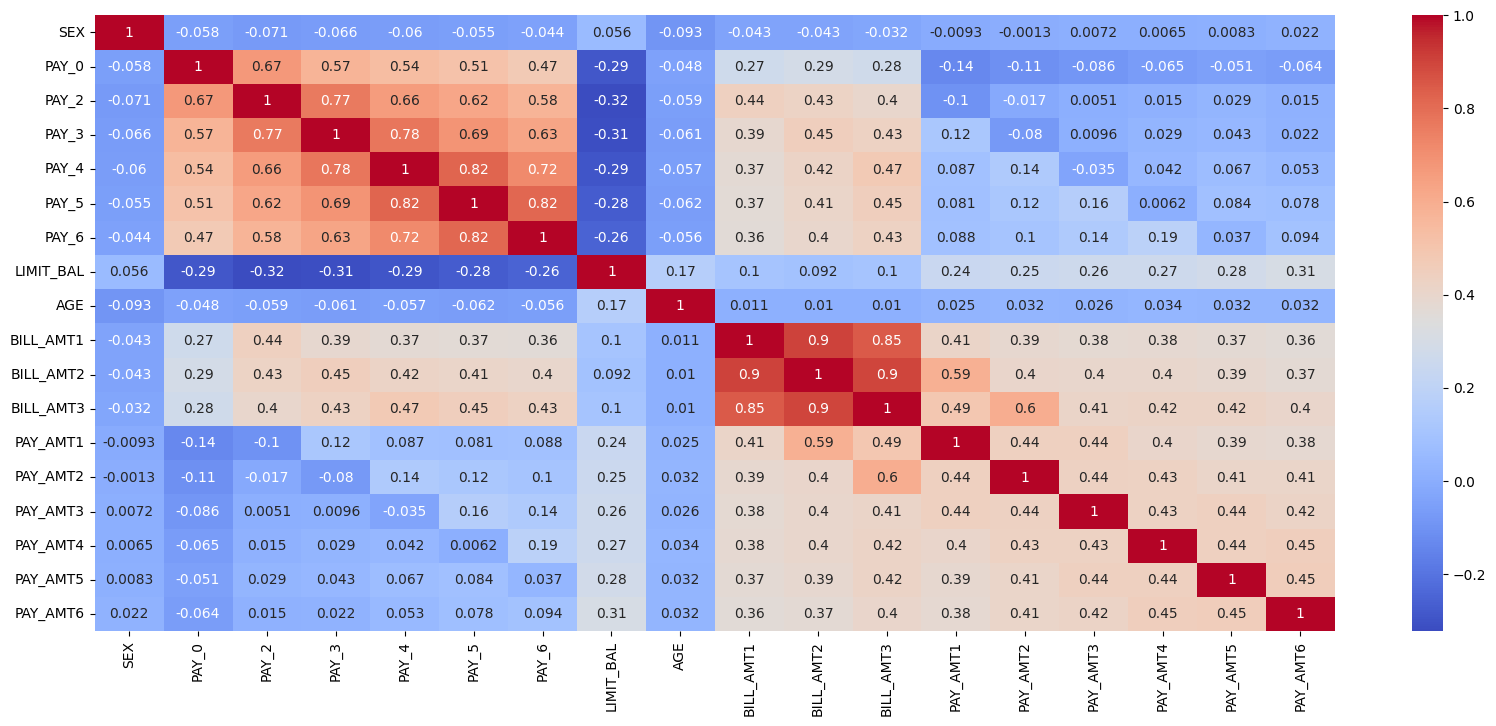

In [40]:
plt.figure(figsize=(20,8))
sns.heatmap((features.corr()),annot=True,cmap='coolwarm')

In [54]:
#Splitting the Dataset:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,y,test_size=0.25,random_state=116,stratify=y)
(X_train.shape,X_test.shape)

((22500, 18), (7500, 18))

In [55]:
y_train.value_counts()

,count
default payment next month,
0,17523
1,4977


In [56]:
# Scaling the features:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2> Model 1: Logistic Regression

In [57]:
from imblearn.combine import SMOTEENN
smotenn = SMOTEENN()
X_smote,y_smote = smotenn.fit_resample(X_train,y_train)
X_train = X_smote
y_train = y_smote

In [58]:
y_train.value_counts()

,count
default payment next month,
1,14107
0,9029


In [59]:
y_test.value_counts()

,count
default payment next month,
0,5841
1,1659


In [60]:
# Model fitting :
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.7543654910096819

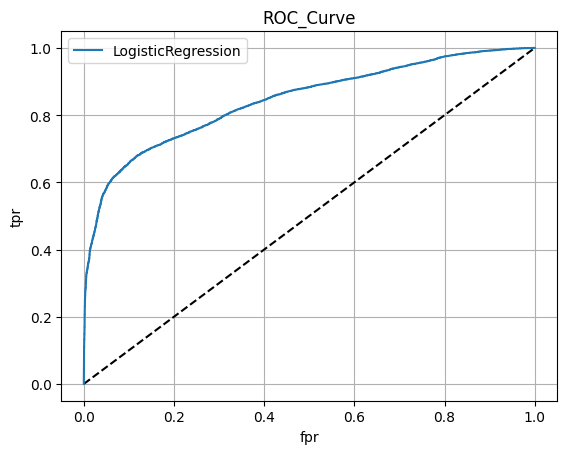

In [61]:
from sklearn.metrics import roc_curve
y_train_pred_prob = clf.predict_proba(X_train)[:,1]
fpr,tpr,threshold = roc_curve(y_train,y_train_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.title('ROC_Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend()

In [62]:
# Predict model:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

#Predict Probability:
y_train_prob = clf.predict_proba(X_train)[:,1]
y_test_prob = clf.predict_proba(X_test)[:,1]

In [63]:
# #confusion_matrics:
# from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
# from sklearn import metrics
# train_cm = confusion_matrix(y_train,y_train_pred)
# test_cm = confusion_matrix(y_test,y_test_pred)

# # Plotting the confusion matrics:
# fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,5))
# sns.heatmap(train_cm,annot=True,ax=ax1)
# sns.heatmap(test_cm,annot=True,ax=ax2)
# ax1.set_title('Training Dataset')
# ax1.set_xlabel('Predicted')
# ax1.set_ylabel('True_label')
# ax2.set_title('Test Dataset')
# ax2.set_xlabel('Predicted')
# ax2.set_ylabel('True_label')

In [64]:
# Evaluation Metrics:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn import metrics
def get_evaluation_score(model,X,y):
  y_pred = model.predict(X)
  y_pred_prob = model.predict_proba(X)[:,1]
  #Accuracy_Score:
  train_accuracy = accuracy_score(y,y_pred)
  #roc_auc_score:
  train_auc_score = roc_auc_score(y,y_pred_prob)
  #precision:
  train_precision = metrics.precision_score(y,y_pred)
  #Recall:
  train_recall = metrics.recall_score(y,y_pred)
  #F-score:
  train_fscore = metrics.f1_score(y,y_pred)

  return {'Auc_score' : train_auc_score ,'Accuracy' : train_accuracy ,'Precision' : train_precision ,'Recall':train_recall ,'f1_score':train_fscore}

In [65]:
eval_metricsdf = pd.DataFrame({'metrics':['Auc_score','Accuracy','Precision','Recall','f1_score']}).set_index('metrics')

In [66]:
eval_metricsdf['LogisticRegression_Train'] = get_evaluation_score(clf,X_train,y_train)
eval_metricsdf['LogisticRegression_Test'] = get_evaluation_score(clf,X_test,y_test)

In [67]:
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test
metrics,,
Auc_score,0.844302,0.737013
Accuracy,0.754365,0.574933
Precision,0.786141,0.314756
Recall,0.820302,0.783002
f1_score,0.802858,0.449015


In [68]:
print(confusion_matrix(y_train,clf.predict(X_train)))
print(classification_report(y_train,clf.predict(X_train)))

[[ 5881  3148]
 [ 2535 11572]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67      9029
           1       0.79      0.82      0.80     14107

    accuracy                           0.75     23136
   macro avg       0.74      0.74      0.74     23136
weighted avg       0.75      0.75      0.75     23136



In [69]:
print(confusion_matrix(y_test,clf.predict(X_test)))
print(classification_report(y_test,clf.predict(X_test)))

[[3013 2828]
 [ 360 1299]]
              precision    recall  f1-score   support

           0       0.89      0.52      0.65      5841
           1       0.31      0.78      0.45      1659

    accuracy                           0.57      7500
   macro avg       0.60      0.65      0.55      7500
weighted avg       0.77      0.57      0.61      7500



In [70]:
# CrossValidation and Hyperparameter Tuning:
from sklearn.model_selection import cross_validate
scoring = ['accuracy','roc_auc','precision','recall','f1']
clf = LogisticRegression()
score = cross_validate(clf, X_train, y_train,scoring=scoring,cv=5,return_train_score=True,return_estimator=True,verbose=10)

[CV] START .....................................................................
[CV] END  accuracy: (train=0.753, test=0.765) f1: (train=0.802, test=0.812) precision: (train=0.784, test=0.792) recall: (train=0.821, test=0.833) roc_auc: (train=0.842, test=0.855) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s


[CV] END  accuracy: (train=0.753, test=0.751) f1: (train=0.801, test=0.800) precision: (train=0.785, test=0.785) recall: (train=0.819, test=0.815) roc_auc: (train=0.844, test=0.843) total time=   0.2s
[CV] START .....................................................................
[CV] END  accuracy: (train=0.756, test=0.751) f1: (train=0.804, test=0.800) precision: (train=0.788, test=0.786) recall: (train=0.821, test=0.814) roc_auc: (train=0.845, test=0.843) total time=   0.2s
[CV] START .....................................................................
[CV] END  accuracy: (train=0.756, test=0.744) f1: (train=0.804, test=0.796) precision: (train=0.788, test=0.773) recall: (train=0.821, test=0.821) roc_auc: (train=0.846, test=0.835) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.2s


[CV] END  accuracy: (train=0.754, test=0.749) f1: (train=0.802, test=0.795) precision: (train=0.788, test=0.790) recall: (train=0.816, test=0.800) roc_auc: (train=0.844, test=0.843) total time=   0.2s


In [71]:
for s in scoring:
  scor = score['test_'+s].mean()
  print(f'{s} : {scor}')

accuracy : 0.7519444697137672
roc_auc : 0.8436942968648756
precision : 0.7851949923285247
recall : 0.816686760805551
f1 : 0.800578432550776


In [72]:
eval_metricsdf['LogisticRegressionCV_Train'] = [0.751944,0.843694,0.785194,0.816686,0.800578]

In [73]:
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train
metrics,,,
Auc_score,0.844302,0.737013,0.751944
Accuracy,0.754365,0.574933,0.843694
Precision,0.786141,0.314756,0.785194
Recall,0.820302,0.783002,0.816686
f1_score,0.802858,0.449015,0.800578


<h2> Model 2: RandomForest classification

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
rfc = RandomForestClassifier(max_depth= 10,min_samples_leaf= 5,min_samples_split=10,random_state=116)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=116)

In [75]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [76]:
accuracy_score(y_train,y_train_pred)

0.8711964038727524

In [77]:
accuracy_score(y_test,y_test_pred)

0.6933333333333334

In [78]:
roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])

0.7665710651121507

In [79]:
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))

[[ 7877  1152]
 [ 1828 12279]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      9029
           1       0.91      0.87      0.89     14107

    accuracy                           0.87     23136
   macro avg       0.86      0.87      0.87     23136
weighted avg       0.87      0.87      0.87     23136



In [80]:
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[4039 1802]
 [ 498 1161]]
              precision    recall  f1-score   support

           0       0.89      0.69      0.78      5841
           1       0.39      0.70      0.50      1659

    accuracy                           0.69      7500
   macro avg       0.64      0.70      0.64      7500
weighted avg       0.78      0.69      0.72      7500



In [82]:
eval_metricsdf['RandomForest_Train'] = get_evaluation_score(rfc,X_train,y_train)
eval_metricsdf['RandomForest_Test'] = get_evaluation_score(rfc,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test
metrics,,,,,
Auc_score,0.844302,0.737013,0.751944,0.952081,0.766571
Accuracy,0.754365,0.574933,0.843694,0.871196,0.693333
Precision,0.786141,0.314756,0.785194,0.914228,0.391833
Recall,0.820302,0.783002,0.816686,0.870419,0.699819
f1_score,0.802858,0.449015,0.800578,0.891786,0.502380


In [83]:
# cross validation and hyperparameter tuning:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedKFold
rfc = RandomForestClassifier()
cv = RepeatedKFold(n_splits=5,n_repeats=5,random_state=116)
param = {'n_estimators':[100,200,300],
          'max_depth':[5,6,8,10],
          'min_samples_leaf':[4,6,8,10],
          'min_samples_split':[5,8,10,20],
          'max_features':['auto','sqrt','log2']}

rfc_cv = RandomizedSearchCV(estimator=rfc,param_distributions=param,n_iter=10,cv=5,verbose=3)
rfc_cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100;, score=0.812 total time=   3.4s
[CV 2/5] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100;, score=0.813 total time=   4.3s
[CV 3/5] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100;, score=0.809 total time=   3.5s
[CV 4/5] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100;, score=0.816 total time=   3.1s
[CV 5/5] END max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=20, n_estimators=100;, score=0.818 total time=   3.2s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=200;, score=nan

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [4, 6, 8, 10],
                                        'min_samples_split': [5, 8, 10, 20],
                                        'n_estimators': [100, 200, 300]},
                   verbose=3)

In [84]:
rfc_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 10}

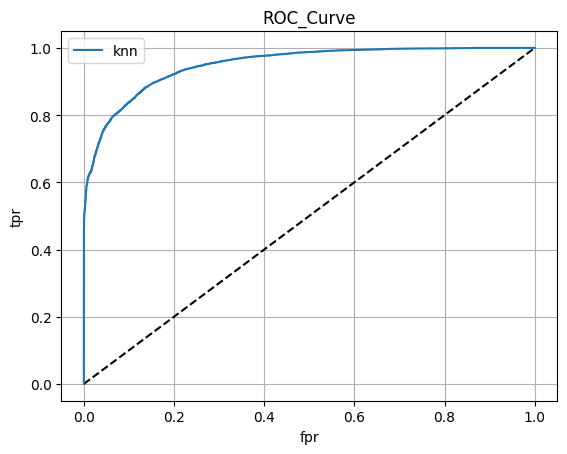

In [85]:
from sklearn.metrics import roc_curve
y_train_pred_prob = rfc_cv.predict_proba(X_train)[:,1]
fpr,tpr,threshold = roc_curve(y_train,y_train_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.title('ROC_Curve')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend()

In [86]:
roc_auc_score(y_train,rfc_cv.predict_proba(X_train)[:,1])

0.9506110533481573

In [87]:
roc_auc_score(y_test,rfc_cv.predict_proba(X_test)[:,1])

0.7669895799052633

In [88]:
print(confusion_matrix(y_train,rfc_cv.predict(X_train)))
print(classification_report(y_train,rfc_cv.predict(X_train)))

[[ 7853  1176]
 [ 1767 12340]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      9029
           1       0.91      0.87      0.89     14107

    accuracy                           0.87     23136
   macro avg       0.86      0.87      0.87     23136
weighted avg       0.88      0.87      0.87     23136



In [89]:
print(confusion_matrix(y_test,rfc_cv.predict(X_test)))
print(classification_report(y_test,rfc_cv.predict(X_test)))

[[4001 1840]
 [ 496 1163]]
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      5841
           1       0.39      0.70      0.50      1659

    accuracy                           0.69      7500
   macro avg       0.64      0.69      0.64      7500
weighted avg       0.78      0.69      0.71      7500



In [90]:
eval_metricsdf['RandomForestRSCV_Train'] = get_evaluation_score(rfc_cv,X_train,y_train)
eval_metricsdf['RandomForestRSCV_Test'] = get_evaluation_score(rfc_cv,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test,RandomForestRSCV_Train,RandomForestRSCV_Test
metrics,,,,,,,
Auc_score,0.844302,0.737013,0.751944,0.952081,0.766571,0.950611,0.766990
Accuracy,0.754365,0.574933,0.843694,0.871196,0.693333,0.872796,0.688533
Precision,0.786141,0.314756,0.785194,0.914228,0.391833,0.912992,0.387279
Recall,0.820302,0.783002,0.816686,0.870419,0.699819,0.874743,0.701025
f1_score,0.802858,0.449015,0.800578,0.891786,0.502380,0.893458,0.498927


In [91]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedKFold
rfc = RandomForestClassifier()
cv = RepeatedKFold(n_splits=5,n_repeats=5,random_state=116)
params = {'n_estimators':[100,200],
          'max_depth':[3,5,7],
          'min_samples_leaf':[5,10,20],
          'min_samples_split':[8,10,15]}
rfc_gcv = GridSearchCV(estimator=rfc,param_grid=params,cv=3,verbose=3)
rfc_gcv.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV 1/3] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.784 total time=   1.7s
[CV 2/3] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.790 total time=   1.5s
[CV 3/3] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.798 total time=   1.9s
[CV 1/3] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.782 total time=   4.3s
[CV 2/3] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.794 total time=   3.0s
[CV 3/3] END max_depth=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.797 total time=   3.0s
[CV 1/3] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.788 total time=   1.7s
[CV 2/3] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.785 total time=   1.6s


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [8, 10, 15],
                         'n_estimators': [100, 200]},
             verbose=3)

In [92]:
rfc_gcv.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [93]:
roc_auc_score(y_train,rfc_gcv.predict_proba(X_train)[:,1])

0.9178389674542784

In [94]:
roc_auc_score(y_test,rfc_gcv.predict_proba(X_test)[:,1])

0.7658070988901282

In [95]:
print(confusion_matrix(y_train,rfc_gcv.predict(X_train)))
print(classification_report(y_train,rfc_gcv.predict(X_train)))

[[ 7588  1441]
 [ 2469 11638]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.80      9029
           1       0.89      0.82      0.86     14107

    accuracy                           0.83     23136
   macro avg       0.82      0.83      0.83     23136
weighted avg       0.84      0.83      0.83     23136



In [96]:
print(confusion_matrix(y_test,rfc_gcv.predict(X_test)))
print(classification_report(y_test,rfc_gcv.predict(X_test)))

[[3969 1872]
 [ 477 1182]]
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      5841
           1       0.39      0.71      0.50      1659

    accuracy                           0.69      7500
   macro avg       0.64      0.70      0.64      7500
weighted avg       0.78      0.69      0.71      7500



In [97]:
eval_metricsdf['RandomForestGSCV_Train'] = get_evaluation_score(rfc_gcv,X_train,y_train)
eval_metricsdf['RandomForestGSCV_Test'] = get_evaluation_score(rfc_gcv,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test,RandomForestRSCV_Train,RandomForestRSCV_Test,RandomForestGSCV_Train,RandomForestGSCV_Test
metrics,,,,,,,,,
Auc_score,0.844302,0.737013,0.751944,0.952081,0.766571,0.950611,0.766990,0.917839,0.765807
Accuracy,0.754365,0.574933,0.843694,0.871196,0.693333,0.872796,0.688533,0.830999,0.686800
Precision,0.786141,0.314756,0.785194,0.914228,0.391833,0.912992,0.387279,0.889823,0.387033
Recall,0.820302,0.783002,0.816686,0.870419,0.699819,0.874743,0.701025,0.824981,0.712477
f1_score,0.802858,0.449015,0.800578,0.891786,0.502380,0.893458,0.498927,0.856176,0.501591


<h2> Model 3: K-nearest Neighbouring (kNN)

In [98]:
#lets deal with imbalanced data first by using SMOTE.
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote,y_smote = X_train,y_train

In [99]:
y_train.value_counts()

,count
default payment next month,
1,14107
0,9029


In [100]:
from sklearn.neighbors import KNeighborsClassifier
# set the neighbors:
neighbor = np.arange(1,21)

# set the empty array to record train and test accuracy:
train_accuracy = np.empty(len(neighbor))
test_accuracy = np.empty(len(neighbor))

# Now lets run the algorithm:
for i,k in enumerate(neighbor):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_smote,y_smote)
  #record the score:
  train_accuracy[i] = roc_auc_score(y_smote,knn.predict_proba(X_smote)[:,1])
  test_accuracy[i] = roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])

In [101]:
train_accuracy

array([1.        , 0.9999593 , 0.99980001, 0.99945169, 0.99865416,
       0.99726831, 0.99526327, 0.99278847, 0.99019085, 0.98751547,
       0.98471391, 0.98208581, 0.97950958, 0.97703464, 0.97457971,
       0.97206897, 0.9697808 , 0.96760325, 0.96564278, 0.96347789])

In [102]:
test_accuracy

array([0.65202706, 0.67431262, 0.68660352, 0.69573345, 0.70139354,
       0.70581563, 0.70969774, 0.71354223, 0.71647823, 0.71917384,
       0.72180572, 0.72365908, 0.72546916, 0.72703295, 0.72875567,
       0.73015259, 0.7323658 , 0.7334827 , 0.73538988, 0.73674718])

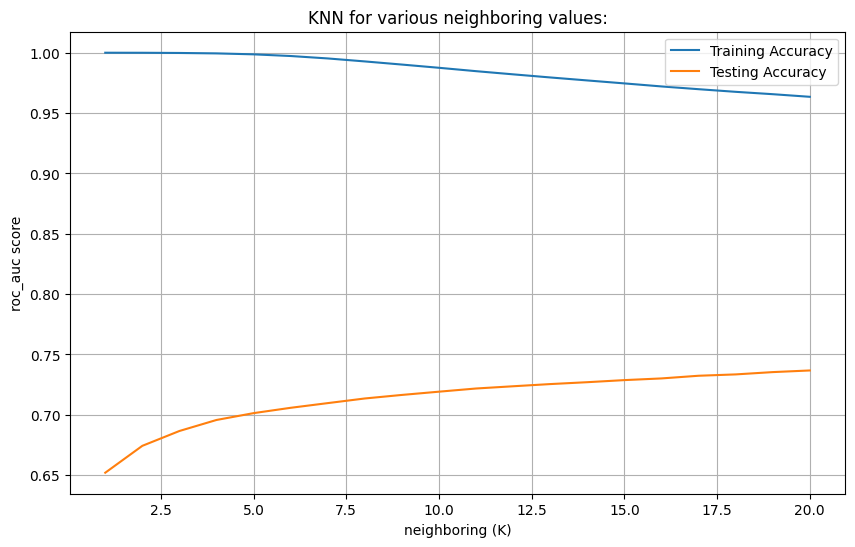

In [103]:
from sqlalchemy import label
plt.figure(figsize=(10,6))
plt.plot(neighbor,train_accuracy,label='Training Accuracy')
plt.plot(neighbor,test_accuracy,label='Testing Accuracy')
plt.title('KNN for various neighboring values:')
plt.xlabel('neighboring (K)')
plt.ylabel('roc_auc score')
plt.legend()
plt.grid()

In [104]:
# from the plot we find that score is converging.
# lets take k = 20
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(X_smote,y_smote)

KNeighborsClassifier(n_neighbors=20)

In [105]:
print(confusion_matrix(y_smote,knn20.predict(X_smote)))
print(classification_report(y_smote,knn20.predict(X_smote)))

[[ 7301  1728]
 [  886 13221]]
              precision    recall  f1-score   support

           0       0.89      0.81      0.85      9029
           1       0.88      0.94      0.91     14107

    accuracy                           0.89     23136
   macro avg       0.89      0.87      0.88     23136
weighted avg       0.89      0.89      0.89     23136



In [106]:
print(confusion_matrix(y_test,knn20.predict(X_test)))
print(classification_report(y_test,knn20.predict(X_test)))

[[3308 2533]
 [ 398 1261]]
              precision    recall  f1-score   support

           0       0.89      0.57      0.69      5841
           1       0.33      0.76      0.46      1659

    accuracy                           0.61      7500
   macro avg       0.61      0.66      0.58      7500
weighted avg       0.77      0.61      0.64      7500



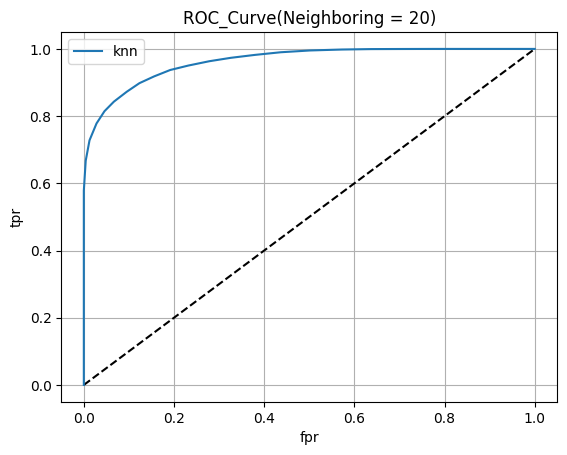

In [107]:
#Lets see roc_auc curve for test data:
from sklearn.metrics import roc_curve
y_train_pred_prob = knn20.predict_proba(X_smote)[:,1]
fpr,tpr,threshold = roc_curve(y_smote,y_train_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.title('ROC_Curve(Neighboring = 20)')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.legend()

In [108]:
eval_metricsdf['KNN20_Train'] = get_evaluation_score(knn20,X_train,y_train)
eval_metricsdf['KNN20_Test'] = get_evaluation_score(knn20,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test,RandomForestRSCV_Train,RandomForestRSCV_Test,RandomForestGSCV_Train,RandomForestGSCV_Test,KNN20_Train,KNN20_Test
metrics,,,,,,,,,,,
Auc_score,0.844302,0.737013,0.751944,0.952081,0.766571,0.950611,0.766990,0.917839,0.765807,0.963478,0.736747
Accuracy,0.754365,0.574933,0.843694,0.871196,0.693333,0.872796,0.688533,0.830999,0.686800,0.887016,0.609200
Precision,0.786141,0.314756,0.785194,0.914228,0.391833,0.912992,0.387279,0.889823,0.387033,0.884407,0.332367
Recall,0.820302,0.783002,0.816686,0.870419,0.699819,0.874743,0.701025,0.824981,0.712477,0.937194,0.760096
f1_score,0.802858,0.449015,0.800578,0.891786,0.502380,0.893458,0.498927,0.856176,0.501591,0.910036,0.462498


<h2> Navie Bayes Classification Model

In [114]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [115]:
# Predict model:
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

#Predict Probability:
y_train_prob = gnb.predict_proba(X_train)[:,1]
y_test_prob = gnb.predict_proba(X_test)[:,1]

In [116]:
print(confusion_matrix(y_train,y_train_pred))
print(classification_report(y_train,y_train_pred))

[[ 7243  1786]
 [ 3735 10372]]
              precision    recall  f1-score   support

           0       0.66      0.80      0.72      9029
           1       0.85      0.74      0.79     14107

    accuracy                           0.76     23136
   macro avg       0.76      0.77      0.76     23136
weighted avg       0.78      0.76      0.76     23136



In [117]:
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[3937 1904]
 [ 514 1145]]
              precision    recall  f1-score   support

           0       0.88      0.67      0.77      5841
           1       0.38      0.69      0.49      1659

    accuracy                           0.68      7500
   macro avg       0.63      0.68      0.63      7500
weighted avg       0.77      0.68      0.70      7500



In [118]:
eval_metricsdf['GaussianNB_Train'] = get_evaluation_score(gnb,X_train,y_train)
eval_metricsdf['GaussianNB_Test'] = get_evaluation_score(gnb,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test,RandomForestRSCV_Train,RandomForestRSCV_Test,RandomForestGSCV_Train,RandomForestGSCV_Test,KNN20_Train,KNN20_Test,GaussianNB_Train,GaussianNB_Test
metrics,,,,,,,,,,,,,
Auc_score,0.844302,0.737013,0.751944,0.952081,0.766571,0.950611,0.766990,0.917839,0.765807,0.963478,0.736747,0.846244,0.741891
Accuracy,0.754365,0.574933,0.843694,0.871196,0.693333,0.872796,0.688533,0.830999,0.686800,0.887016,0.609200,0.761368,0.677600
Precision,0.786141,0.314756,0.785194,0.914228,0.391833,0.912992,0.387279,0.889823,0.387033,0.884407,0.332367,0.853101,0.375533
Recall,0.820302,0.783002,0.816686,0.870419,0.699819,0.874743,0.701025,0.824981,0.712477,0.937194,0.760096,0.735238,0.690175
f1_score,0.802858,0.449015,0.800578,0.891786,0.502380,0.893458,0.498927,0.856176,0.501591,0.910036,0.462498,0.789796,0.486406


In [120]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier(max_depth = 6,min_samples_leaf=5,min_samples_split=15)
dc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=15)

In [121]:
print(confusion_matrix(y_train,dc.predict(X_train)))
print(classification_report(y_train,dc.predict(X_train)))

[[ 7506  1523]
 [ 2687 11420]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78      9029
           1       0.88      0.81      0.84     14107

    accuracy                           0.82     23136
   macro avg       0.81      0.82      0.81     23136
weighted avg       0.83      0.82      0.82     23136



In [122]:
print(confusion_matrix(y_test,dc.predict(X_test)))
print(classification_report(y_test,dc.predict(X_test)))

[[3971 1870]
 [ 546 1113]]
              precision    recall  f1-score   support

           0       0.88      0.68      0.77      5841
           1       0.37      0.67      0.48      1659

    accuracy                           0.68      7500
   macro avg       0.63      0.68      0.62      7500
weighted avg       0.77      0.68      0.70      7500



In [123]:
dc = DecisionTreeClassifier()
param = {'min_samples_leaf':[5,10,20,40],
         'max_depth':[3,5,7,9]}
dc_gcv = GridSearchCV(estimator=dc,param_grid=param,verbose=2,cv=5)
dc_gcv.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ....................max_depth=3, min_samples_leaf=5; total time=   0.1s
[CV] END ....................max_depth=3, min_samples_leaf=5; total time=   0.1s
[CV] END ....................max_depth=3, min_samples_leaf=5; total time=   0.1s
[CV] END ....................max_depth=3, min_samples_leaf=5; total time=   0.1s
[CV] END ....................max_depth=3, min_samples_leaf=5; total time=   0.1s
[CV] END ...................max_depth=3, min_samples_leaf=10; total time=   0.1s
[CV] END ...................max_depth=3, min_samples_leaf=10; total time=   0.1s
[CV] END ...................max_depth=3, min_samples_leaf=10; total time=   0.1s
[CV] END ...................max_depth=3, min_samples_leaf=10; total time=   0.1s
[CV] END ...................max_depth=3, min_samples_leaf=10; total time=   0.1s
[CV] END ...................max_depth=3, min_samples_leaf=20; total time=   0.1s
[CV] END ...................max_depth=3, min_sam

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [5, 10, 20, 40]},
             verbose=2)

In [124]:
dc_gcv.best_params_

{'max_depth': 9, 'min_samples_leaf': 5}

In [125]:
print(confusion_matrix(y_train,dc_gcv.predict(X_train)))
print(classification_report(y_train,dc_gcv.predict(X_train)))

[[ 7163  1866]
 [ 1632 12475]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      9029
           1       0.87      0.88      0.88     14107

    accuracy                           0.85     23136
   macro avg       0.84      0.84      0.84     23136
weighted avg       0.85      0.85      0.85     23136



In [126]:
print(confusion_matrix(y_test,dc_gcv.predict(X_test)))
print(classification_report(y_test,dc_gcv.predict(X_test)))

[[3604 2237]
 [ 488 1171]]
              precision    recall  f1-score   support

           0       0.88      0.62      0.73      5841
           1       0.34      0.71      0.46      1659

    accuracy                           0.64      7500
   macro avg       0.61      0.66      0.59      7500
weighted avg       0.76      0.64      0.67      7500



In [128]:
eval_metricsdf['DecisionTree_Train'] = get_evaluation_score(dc_gcv,X_train,y_train)
eval_metricsdf['DecisionTree_Test'] = get_evaluation_score(dc_gcv,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test,RandomForestRSCV_Train,RandomForestRSCV_Test,RandomForestGSCV_Train,RandomForestGSCV_Test,KNN20_Train,KNN20_Test,GaussianNB_Train,GaussianNB_Test,DecisionTree_Train,DecisionTree_Test
metrics,,,,,,,,,,,,,,,
Auc_score,0.844302,0.737013,0.751944,0.952081,0.766571,0.950611,0.766990,0.917839,0.765807,0.963478,0.736747,0.846244,0.741891,0.930992,0.725425
Accuracy,0.754365,0.574933,0.843694,0.871196,0.693333,0.872796,0.688533,0.830999,0.686800,0.887016,0.609200,0.761368,0.677600,0.848807,0.636667
Precision,0.786141,0.314756,0.785194,0.914228,0.391833,0.912992,0.387279,0.889823,0.387033,0.884407,0.332367,0.853101,0.375533,0.869884,0.343603
Recall,0.820302,0.783002,0.816686,0.870419,0.699819,0.874743,0.701025,0.824981,0.712477,0.937194,0.760096,0.735238,0.690175,0.884313,0.705847
f1_score,0.802858,0.449015,0.800578,0.891786,0.502380,0.893458,0.498927,0.856176,0.501591,0.910036,0.462498,0.789796,0.486406,0.877039,0.462206


In [129]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [130]:
print(confusion_matrix(y_train,adaboost.predict(X_train)))
print(classification_report(y_train,adaboost.predict(X_train)))

[[ 7231  1798]
 [ 2443 11664]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      9029
           1       0.87      0.83      0.85     14107

    accuracy                           0.82     23136
   macro avg       0.81      0.81      0.81     23136
weighted avg       0.82      0.82      0.82     23136



In [131]:
print(confusion_matrix(y_test,adaboost.predict(X_test)))
print(classification_report(y_test,adaboost.predict(X_test)))

[[3860 1981]
 [ 473 1186]]
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      5841
           1       0.37      0.71      0.49      1659

    accuracy                           0.67      7500
   macro avg       0.63      0.69      0.63      7500
weighted avg       0.78      0.67      0.70      7500



In [132]:
param = {'n_estimators':[50,100,150,200,300],
         'learning_rate':[0.001,0.01,0.1,1]}
ada_gcv = GridSearchCV(estimator=adaboost,param_grid=param,verbose=2,cv=3)
ada_gcv.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   2.5s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   2.5s
[CV] END ...............learning_rate=0.001, n_estimators=50; total time=   2.0s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   3.9s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   3.5s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   4.5s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   6.2s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   5.2s
[CV] END ..............learning_rate=0.001, n_estimators=150; total time=   6.7s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   7.6s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   8.3s
[CV] END ..............learning_rate=0.001, n_es

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'n_estimators': [50, 100, 150, 200, 300]},
             verbose=2)

In [133]:
ada_gcv.best_params_

{'learning_rate': 1, 'n_estimators': 300}

In [134]:
print(confusion_matrix(y_train,ada_gcv.predict(X_train)))
print(classification_report(y_train,ada_gcv.predict(X_train)))

[[ 7638  1391]
 [ 1903 12204]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      9029
           1       0.90      0.87      0.88     14107

    accuracy                           0.86     23136
   macro avg       0.85      0.86      0.85     23136
weighted avg       0.86      0.86      0.86     23136



In [135]:
print(confusion_matrix(y_test,ada_gcv.predict(X_test)))
print(classification_report(y_test,ada_gcv.predict(X_test)))

[[4147 1694]
 [ 533 1126]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      5841
           1       0.40      0.68      0.50      1659

    accuracy                           0.70      7500
   macro avg       0.64      0.69      0.65      7500
weighted avg       0.78      0.70      0.73      7500



In [136]:
eval_metricsdf['Adaboost_Train'] = get_evaluation_score(ada_gcv,X_train,y_train)
eval_metricsdf['Adaboost_Test'] = get_evaluation_score(ada_gcv,X_test,y_test)
eval_metricsdf

,LogisticRegression_Train,LogisticRegression_Test,LogisticRegressionCV_Train,RandomForest_Train,RandomForest_Test,RandomForestRSCV_Train,RandomForestRSCV_Test,RandomForestGSCV_Train,RandomForestGSCV_Test,KNN20_Train,KNN20_Test,GaussianNB_Train,GaussianNB_Test,DecisionTree_Train,DecisionTree_Test,Adaboost_Train,Adaboost_Test
metrics,,,,,,,,,,,,,,,,,
Auc_score,0.844302,0.737013,0.751944,0.952081,0.766571,0.950611,0.766990,0.917839,0.765807,0.963478,0.736747,0.846244,0.741891,0.930992,0.725425,0.938080,0.756541
Accuracy,0.754365,0.574933,0.843694,0.871196,0.693333,0.872796,0.688533,0.830999,0.686800,0.887016,0.609200,0.761368,0.677600,0.848807,0.636667,0.857624,0.703067
Precision,0.786141,0.314756,0.785194,0.914228,0.391833,0.912992,0.387279,0.889823,0.387033,0.884407,0.332367,0.853101,0.375533,0.869884,0.343603,0.897683,0.399291
Recall,0.820302,0.783002,0.816686,0.870419,0.699819,0.874743,0.701025,0.824981,0.712477,0.937194,0.760096,0.735238,0.690175,0.884313,0.705847,0.865102,0.678722
f1_score,0.802858,0.449015,0.800578,0.891786,0.502380,0.893458,0.498927,0.856176,0.501591,0.910036,0.462498,0.789796,0.486406,0.877039,0.462206,0.881092,0.502791


In [137]:
from sklearn.svm import SVC
svm = SVC(class_weight={0:1,1:1.565},kernel='rbf')
svm.fit(X_train,y_train)

SVC(class_weight={0: 1, 1: 1.565})

In [138]:
print(confusion_matrix(y_train,svm.predict(X_train)))
print(classification_report(y_train,svm.predict(X_train)))

[[ 6171  2858]
 [  749 13358]]
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      9029
           1       0.82      0.95      0.88     14107

    accuracy                           0.84     23136
   macro avg       0.86      0.82      0.83     23136
weighted avg       0.85      0.84      0.84     23136



In [139]:
print(confusion_matrix(y_test,svm.predict(X_test)))
print(classification_report(y_test,svm.predict(X_test)))

[[2815 3026]
 [ 282 1377]]
              precision    recall  f1-score   support

           0       0.91      0.48      0.63      5841
           1       0.31      0.83      0.45      1659

    accuracy                           0.56      7500
   macro avg       0.61      0.66      0.54      7500
weighted avg       0.78      0.56      0.59      7500

